In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
book_data=pd.read_csv("best-selling-books.csv")
book_data.head(10)

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85.0,"Fantasy, Children's fiction"
7,She: A History of Adventure,H. Rider Haggard,English,1887,83.0,Adventure
8,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,80.0,Detective
9,The Da Vinci Code,Dan Brown,English,2003,80.0,Mystery thriller


In [5]:
print(f"Total Books: {book_data.shape[0]}")

Total Books: 174


In [6]:
book_data.value_counts("Author(s)")

Author(s)
J. K. Rowling           7
Suzanne Collins         3
Roald Dahl              3
Dan Brown               3
Albert Camus            2
                       ..
William Peter Blatty    1
Xaviera Hollander       1
Xue Muqiao              1
Yann Martel             1
Yu Dan                  1
Name: count, Length: 157, dtype: int64

In [8]:
print(f"Average sales: {book_data["Approximate sales in millions"].mean()} million")

Average sales: 30.097126436781608 million


In [9]:
print(f"Median Sales: {book_data["Approximate sales in millions"].median()} million")

Median Sales: 20.0 million


In [12]:
books_before_1950=book_data[book_data["First published"]<=1950]
print(f"Books before 1950 : {books_before_1950.shape[0]}")

Books before 1950 : 49


In [13]:
books_after_2000=book_data[book_data["First published"]>=2000]
print(f"Books after 2000 : {books_after_2000.shape[0]}")

Books after 2000 : 35


In [14]:
book_data

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,NaN
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,NaN
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN


In [17]:
def get_century(year):
    if pd.isna(year):
        return None
    century=(int(year)-1)//100 +1
    suffix="th"

    if 10<century%100<21:
        suffix="th"
    else:
        last_digit=century%10
        
        if last_digit==1:
            suffix="st"
        if last_digit==2:
            suffix="nd"

    return f"{century}{suffix} Century"


In [18]:
book_data["Century"]=book_data["First published"].apply(get_century)

In [19]:
book_data.head(10)

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre,Century
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,19th Century
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella,20th Century
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy,20th Century
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery,20th Century
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga,18th Century
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy,20th Century
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85.0,"Fantasy, Children's fiction",20th Century
7,She: A History of Adventure,H. Rider Haggard,English,1887,83.0,Adventure,19th Century
8,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,80.0,Detective,20th Century
9,The Da Vinci Code,Dan Brown,English,2003,80.0,Mystery thriller,21st Century


In [21]:
average_sales_by_genre=book_data.groupby("Genre")["Approximate sales in millions"].mean().reset_index(name="Average Sales")
average_sales_by_genre

,Genre,Average Sales
0,Adventure,83.0
1,Autobiographical novel,18.0
2,Autobiography,20.0
3,"Bildungsroman, Historical fiction",31.5
4,Biographical novel,25.0
...,...,...
75,"Young Adult novel, adventure, war, science fic...",20.0
76,Young adult fiction,29.0
77,Young adult historical novel,26.0
78,Young adult novel,20.0


In [22]:
average_sales_by_genre.sort_values(axis=0,by="Average Sales",ascending=False)

,Genre,Average Sales
47,Novella,200.0
24,Family saga,100.0
41,Mystery,100.0
0,Adventure,83.0
19,Detective,80.0
...,...,...
32,"Historical fiction, war novel",15.3
59,Science fiction,14.0
22,Erotica,12.8
20,Dystopian fiction,12.0


In [50]:
first_book=book_data.sort_values(axis=0,by="First published")
first_book

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre,Century,Sales Category
140,The Divine Comedy (La Divina Commedia),Dante Alighieri,Italian,1304,11.5,NaN,14th Century,Popular
66,Paul et Virginie,Jacques-Henri Bernardin de Saint-Pierre,French,1788,25.0,Novel,18th Century,Popular
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga,18th Century,Popular
96,Pride and Prejudice,Jane Austen,English,1813,20.0,"Classic regency novel, romance",19th Century,Popular
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,19th Century,Blockbuster
...,...,...,...,...,...,...,...,...
113,All the Light We Cannot See,Anthony Doerr,English,2014,15.3,"Historical fiction, war novel",21st Century,Popular
73,The Girl on the Train,Paula Hawkins,English,2015,23.0,Thriller,21st Century,Popular
166,The Subtle Art of Not Giving a Fuck,Mark Manson,English,2016,10.0,NaN,21st Century,Popular
124,Becoming,Michelle Obama,English,2018,14.0,NaN,21st Century,Popular


In [36]:
print(first_book["Book"].head(1))

140    The Divine Comedy (La Divina Commedia)
Name: Book, dtype: object


In [40]:
top_original_languages=book_data.value_counts("Original language")
print(top_original_languages.head(5))

Original language
English     131
Russian       6
German        5
French        5
Japanese      5
Name: count, dtype: int64


In [41]:
def categorize_books(sales):
    sales=int(sales)
    
    if pd.isna(sales):
        return None
    if sales>100:
        return "Blockbuster"
    elif sales<100 and sales>=50:
        return "Hit"
    else:
        return "Popular"
    

In [47]:
book_data["Sales Category"]=book_data["Approximate sales in millions"].apply(categorize_books)

In [49]:
book_data

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre,Century,Sales Category
140,The Divine Comedy (La Divina Commedia),Dante Alighieri,Italian,1304,11.5,NaN,14th Century,Popular
66,Paul et Virginie,Jacques-Henri Bernardin de Saint-Pierre,French,1788,25.0,Novel,18th Century,Popular
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga,18th Century,Popular
96,Pride and Prejudice,Jane Austen,English,1813,20.0,"Classic regency novel, romance",19th Century,Popular
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,19th Century,Blockbuster
...,...,...,...,...,...,...,...,...
113,All the Light We Cannot See,Anthony Doerr,English,2014,15.3,"Historical fiction, war novel",21st Century,Popular
73,The Girl on the Train,Paula Hawkins,English,2015,23.0,Thriller,21st Century,Popular
166,The Subtle Art of Not Giving a Fuck,Mark Manson,English,2016,10.0,NaN,21st Century,Popular
124,Becoming,Michelle Obama,English,2018,14.0,NaN,21st Century,Popular


In [54]:
top_ten_authors=book_data.groupby("Author(s)")["Approximate sales in millions"].sum().head(10).reset_index(name="Total Sales")
print(top_ten_authors)

                         Author(s)  Total Sales
0                  Agatha Christie        100.0
1                     Albert Camus         22.0
2                     Alex Comfort         10.0
3  Alexander Alexandrovich Fadeyev         26.0
4                     Alice Sebold         10.0
5                    Andrew Morton         10.0
6                      Anna Sewell         50.0
7                       Anne Frank         35.0
8                    Anthony Doerr         15.3
9         Antoine de Saint-Exupéry        200.0


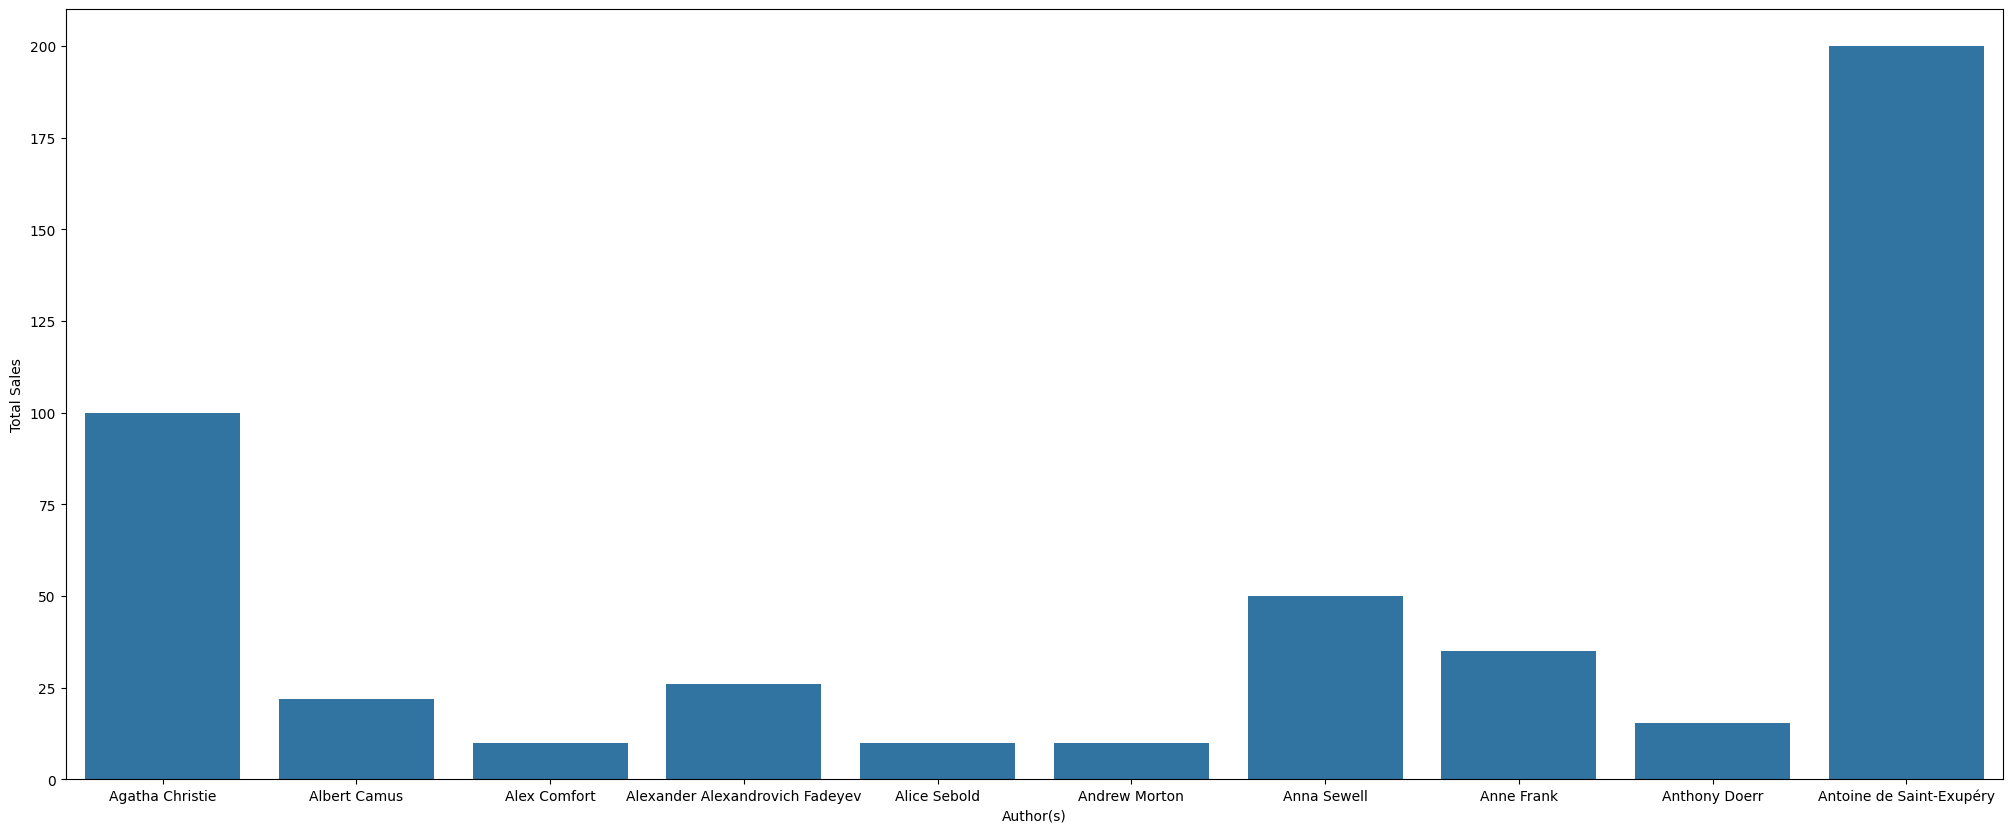

In [59]:
plt.figure(figsize=(25,10))
sns.barplot(data=top_ten_authors,x="Author(s)",y="Total Sales")
plt.show()

In [62]:
books_by_genre=book_data.value_counts("Genre").reset_index(name="Book Count")
books_by_genre

,Genre,Book Count
0,Fantasy,10
1,Novel,8
2,Self-help,7
3,Children's Literature,4
4,Historical fiction,4
...,...,...
75,"Young Adult novel, adventure, war, science fic...",1
76,Young adult fiction,1
77,Young adult historical novel,1
78,Young adult novel,1


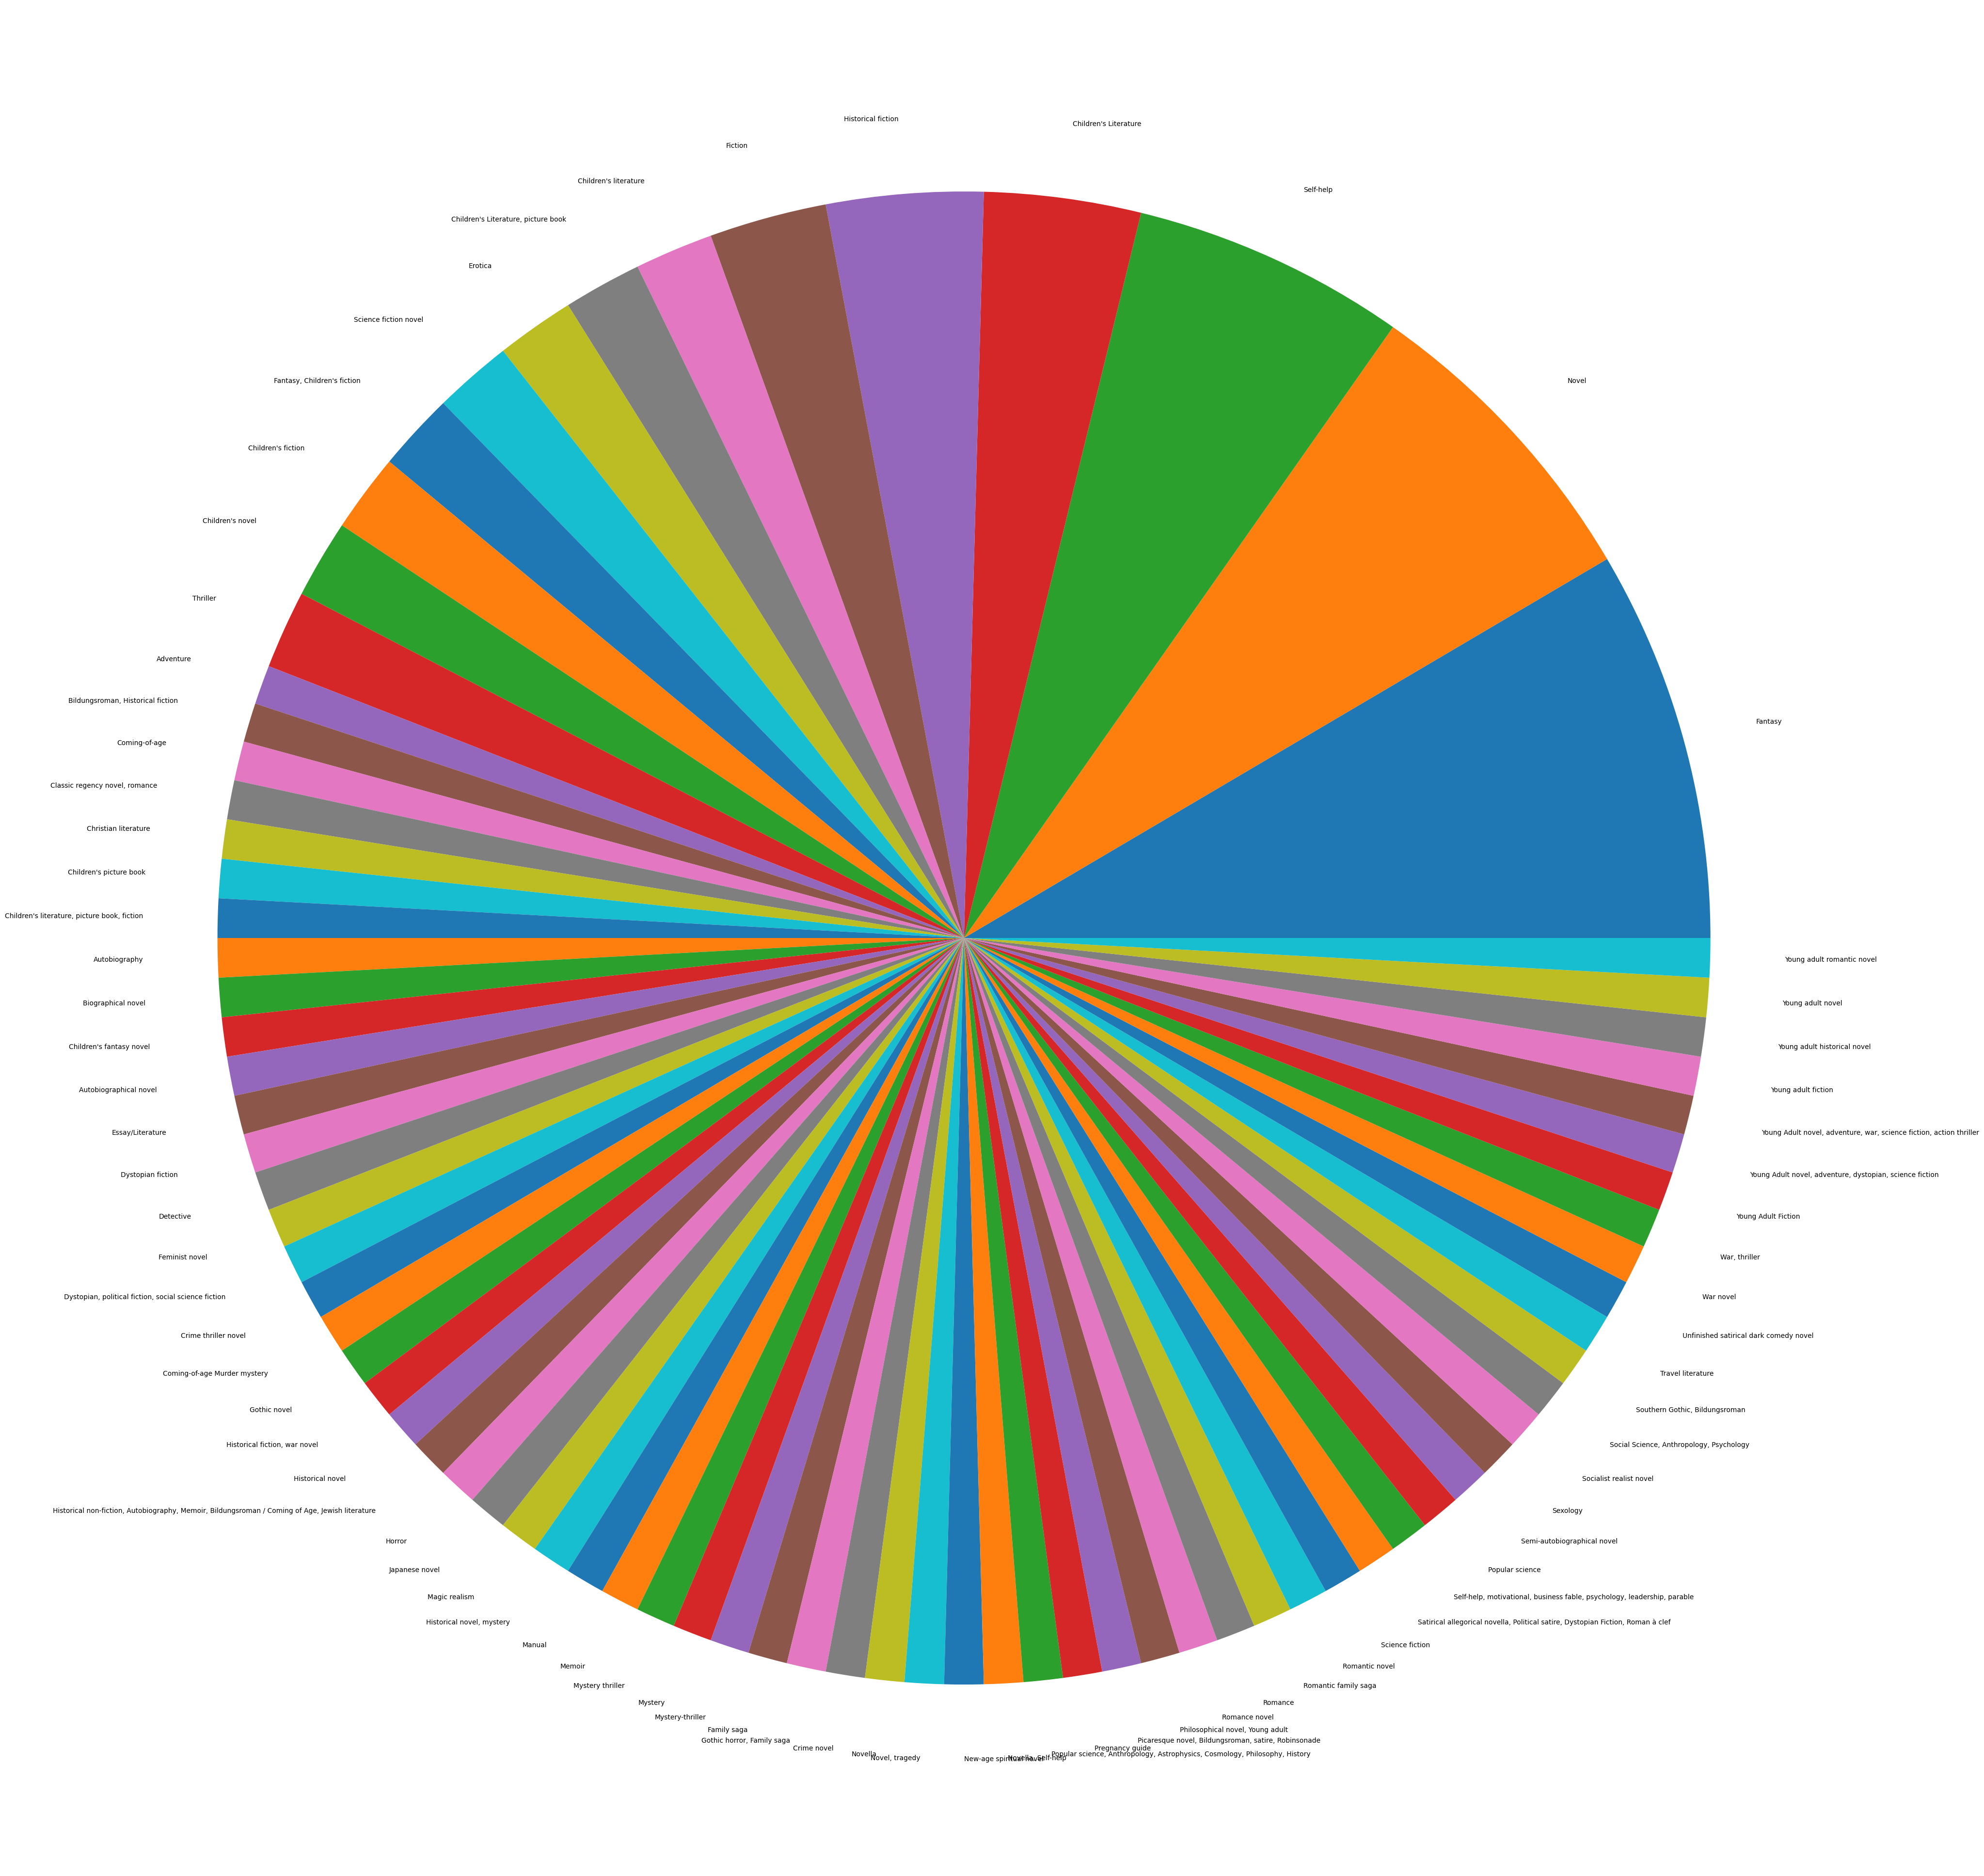

In [65]:
plt.figure(figsize=(50,50))
plt.pie(data=books_by_genre,labels="Genre",x="Book Count")
plt.show()

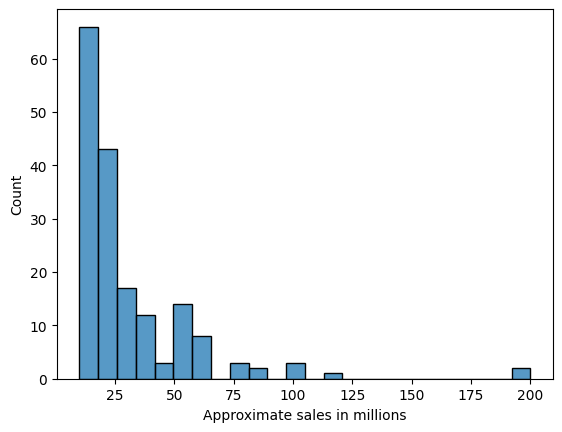

In [66]:
sns.histplot(data=book_data,x="Approximate sales in millions")
plt.show()

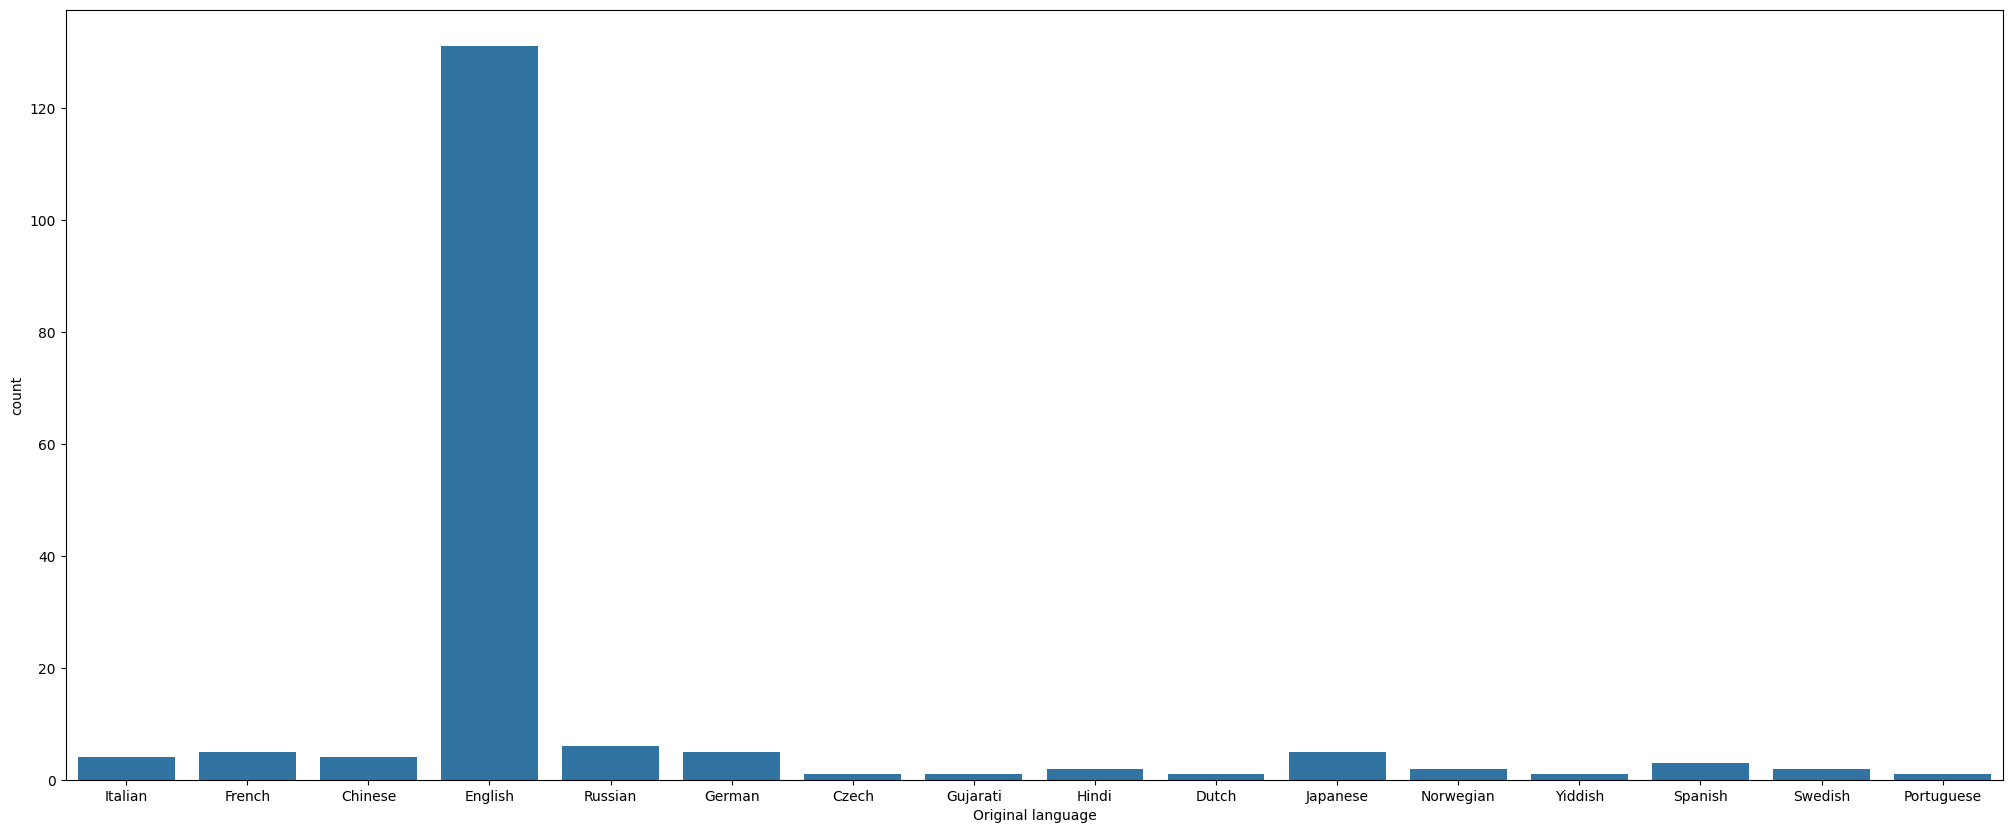

In [72]:
plt.figure(figsize=(25,10))
sns.countplot(x=book_data["Original language"])
plt.show()

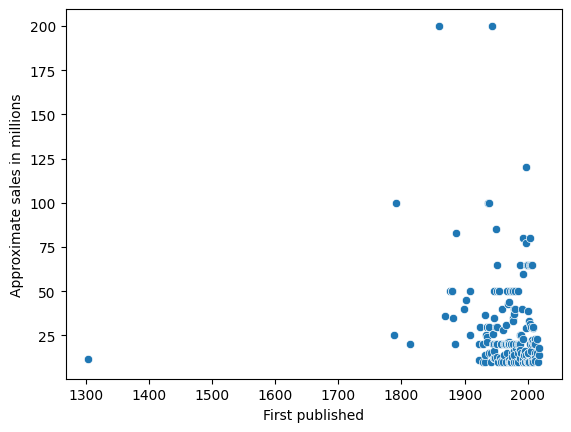

In [74]:
sns.scatterplot(data=book_data,y="Approximate sales in millions",x="First published")
plt.show()